# Лабораторная работа №1 
Шубина София Антоновна
НПИбд-02-23

# Задания:
1. Загрузите данные из файла Canada_mean_salary.csv, проверьте их на наличие пропусков и изобразите точки на плоскости.

2. Разделите выборку на обучающую и тестовую в соотношении 80% к 20%.

3. Постройте модель линейной регрессии на обучающей выборке.

4. Найдите коэффициент детерминации R² для обучающей выборки.

5. Определите параметры уравнения регрессии: свободный член и коэффициент при независимой переменной.

6. Постройте график, на котором будут изображены исходные данные и линия регрессии.

7. Выполните прогноз значений на тестовой выборке.

8. Рассчитайте метрики качества модели на тестовой выборке: среднеквадратичную ошибку (MSE) и коэффициент детерминации R².

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Из файла с данными загружается таблица, в которой содержатся сведения о стаже работы и зарплате.

Выполняется проверка, есть ли пропущенные значения в таблице.

Данные визуализируются на графике: на оси X откладывается стаж, а на оси Y — зарплата. Каждая точка на графике соответствует одной записи из таблицы.

Проверка пропусков:
 Years of Experience    0
Salary                 0
dtype: int64


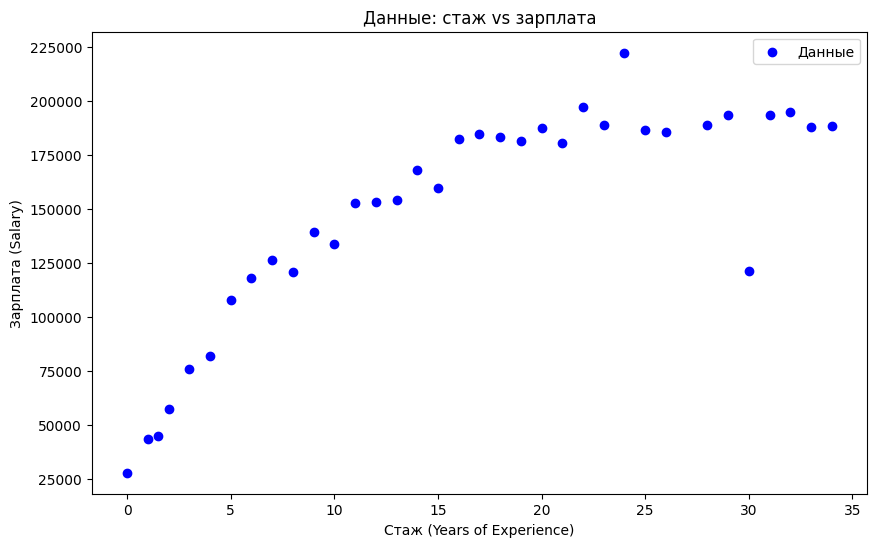

In [5]:
# 1. Загружаем данные
df = pd.read_csv("Canada_mean_salary.csv")

# Проверка на пропуски
print("Проверка пропусков:\n", df.isnull().sum())

# Визуализация исходных данных
plt.figure(figsize=(10,6))
plt.scatter(df["Years of Experience"], df["Salary"], color="blue", label="Данные")
plt.xlabel("Стаж (Years of Experience)")
plt.ylabel("Зарплата (Salary)")
plt.title("Данные: стаж vs зарплата")
plt.legend()
plt.show()

Из таблицы выбирается независимая переменная — стаж работы, и зависимая переменная — зарплата.

Данные делятся на две части: обучающую выборку (80%) и тестовую выборку (20%).

Фиксируется параметр случайности, чтобы при каждом запуске разделение происходило одинаково.

In [12]:
# 2. Разделение данных на train/test (80/20)
X = df[["Years of Experience"]]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

Создаётся модель линейной регрессии и обучается на тренировочных данных. Обучение заключается в том, что модель подбирает коэффициенты, чтобы наилучшим образом предсказывать целевую переменную по входным признакам.

In [13]:
# 3. Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Вычисляется качество модели на тренировочных данных с помощью R², показывая, насколько хорошо модель объясняет зависимость между признаками и целевой переменной. Затем выводятся свободный член и коэффициент, которые описывают уравнение линии регрессии.

In [14]:
# 4. R² на тренировочной выборке
r2_train = model.score(X_train, y_train)
print(f"R² на train: {r2_train:.4f}")

# 5. Коэффициенты модели
print(f"Свободный член (intercept): {model.intercept_:.2f}")
print(f"Коэффициент (slope): {model.coef_[0]:.2f}")

R² на train: 0.6469
Свободный член (intercept): 89873.03
Коэффициент (slope): 3741.91


Строим график, на котором:

- синими точками отображены фактические данные;

- красной линией показана прямая регрессии, которую построила модель.

Также задаются подписи осей, заголовок графика и легенда, чтобы визуально показать зависимость между стажем и зарплатой и как модель её аппроксимирует.

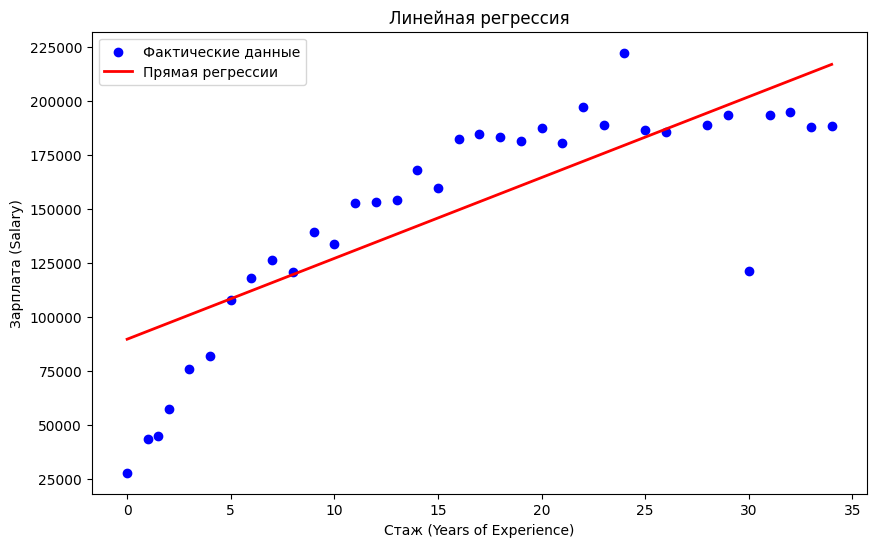

In [17]:
# 6. График: данные + прямая
plt.figure(figsize=(10,6))
plt.scatter(X, y, color="blue", label="Фактические данные")
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Прямая регрессии")
plt.xlabel("Стаж (Years of Experience)")
plt.ylabel("Зарплата (Salary)")
plt.title("Линейная регрессия")
plt.legend()
plt.show()

Прогноз на тестовых данных – модель использует признаки X_test, чтобы предсказать значения y_pred.

Вычисление метрик качества:

MSE (среднеквадратичная ошибка) показывает среднее отклонение предсказаний от фактических значений;

R² показывает, насколько хорошо модель объясняет зависимость на тестовой выборке.

Затем эти метрики выводятся, чтобы оценить точность модели на данных, которые она ещё не видела при обучении.

In [16]:
# 7. Прогноз на тестовой выборке
y_pred = model.predict(X_test)

# 8. Метрики на test
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"MSE на test: {mse_test:.2f}")
print(f"R² на test: {r2_test:.4f}")

MSE на test: 1269955073.06
R² на test: 0.7382


# Вывод:
Построена модель линейной регрессии для прогнозирования заработной платы в зависимости от стажа работы. Модель демонстрирует хорошее качество:

R² на тестовой выборке: 0.7382

R² на тренировочной выборке: 0.6469

MSE на тестовой выборке: 1 269 955 073,06

Полученные результаты свидетельствуют о наличии сильной положительной зависимости между стажем работы и уровнем заработной платы. Значение MSE, хотя и велико в абсолютном выражении, является адекватным при учете масштаба значений заработных плат. Модель показывает хорошую обобщающую способность (R² на тесте выше, чем на трейне), что указывает на ее пригодность для практического использования в прогнозировании заработных плат.

